## Breast Cancer Wisconsin (Diagnostic) Data Set
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor

In [3]:
cancer_data = pd.read_csv("../data/breast-cancer-data.csv")


In [4]:
# Checking the data
cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Columns

cancer_data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# Drop the columns not gonna use
cancer_data.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

In [7]:
# Change the title of the feature that we use as a target
cancer_data = cancer_data.rename(columns = {"diagnosis":"target"})

In [8]:
cancer_data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Looking at the size of our data.
cancer_data.shape

(569, 31)

In [10]:
# Information about data

cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
# Statistical summary 
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


target
B    357
M    212
Name: count, dtype: int64

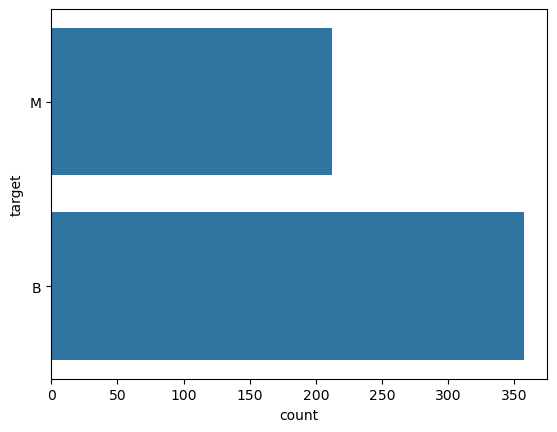

In [12]:
# Lets check the target (diagnosis) data
sns.countplot(cancer_data["target"])
print(cancer_data.target.value_counts())

B --> Benign (357) (İyi Huylu)

M --> Malignant (212) (Kötü Huylu)

In [13]:
#Convert target into int values (0,1)
cancer_data["target"] = [1 if i.strip() == "M" else 0 for i in cancer_data.target] 


### Data Analysis

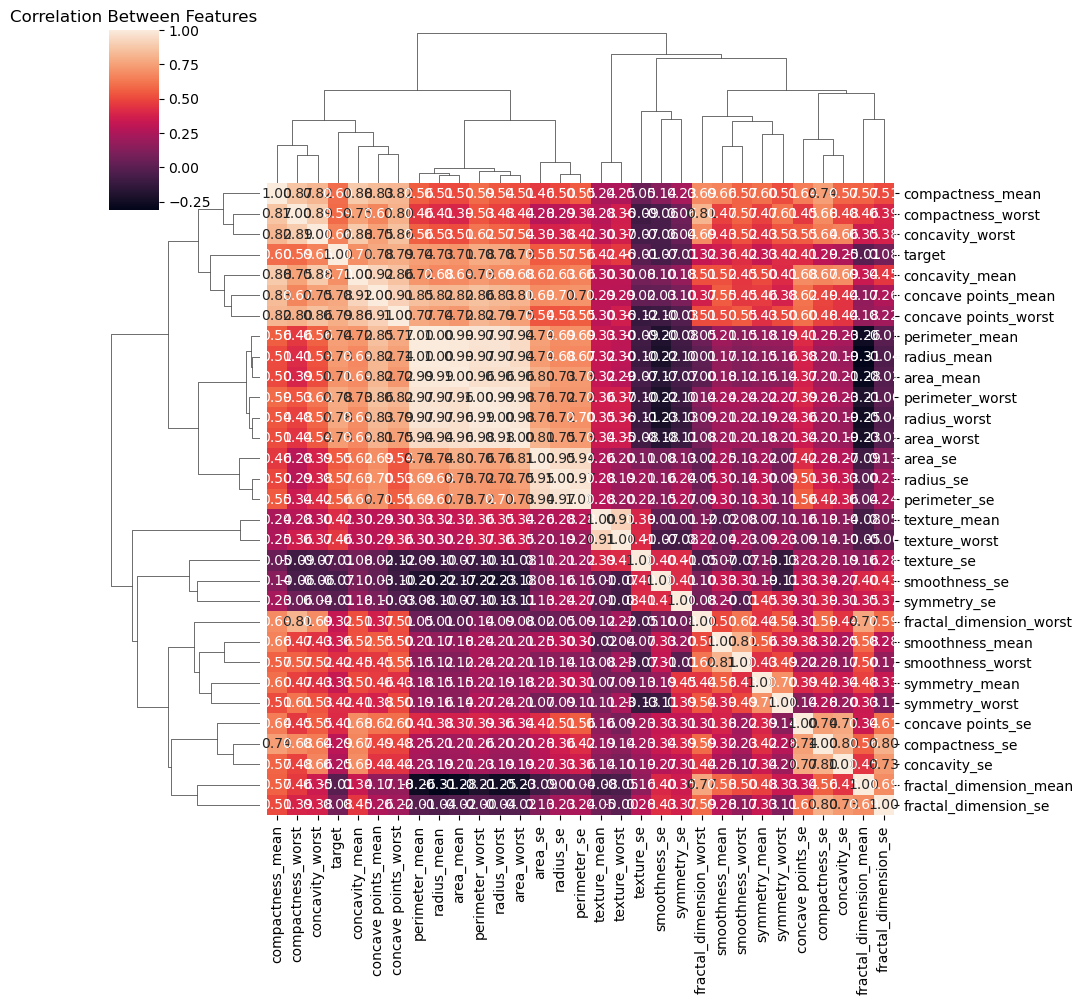

In [14]:
# Compute the correlation matrix of the cancer_data dataset
corr_matrix = cancer_data.corr()

# Use seaborn's clustermap function to create a heatmap of the correlation matrix
# annot=True displays the correlation values on the heatmap
# fmt = ".2f" formats the correlation values to 2 decimal places
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

We draw the relationship matrix and examine the relationships between properties.

If the relation between properties is 1 it means that it is true and -1 means it is inversely proportional.

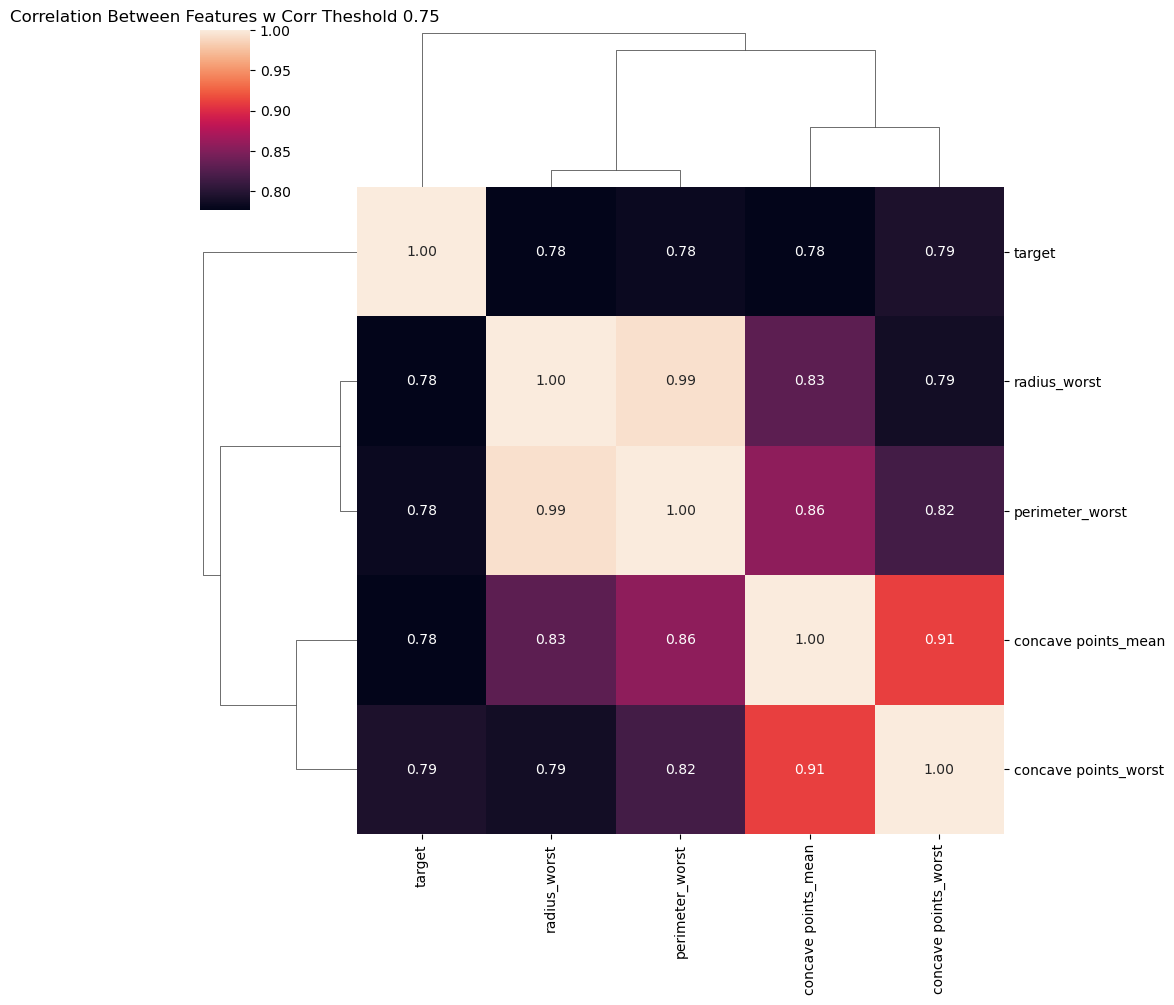

In [17]:
#see the relationship a little better,put a threshold
# Set the correlation threshold
threshold = 0.75 
# Create a boolean mask for the correlation matrix based on the threshold
filtre = np.abs(corr_matrix["target"]) > threshold

# Extract the column names of the features that meet the correlation threshold
corr_features = corr_matrix.columns[filtre].tolist()

# Generate a heatmap of the correlation between the selected features
sns.clustermap(cancer_data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

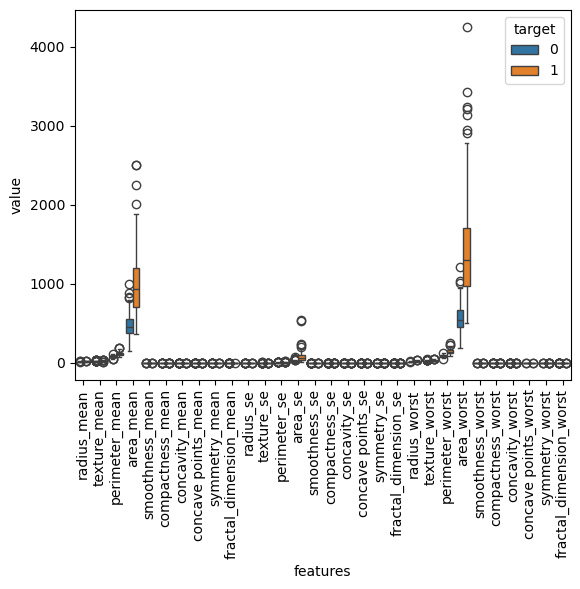

In [18]:
# Melt the cancer_data DataFrame to convert it from wide to long format
data_melted = pd.melt(cancer_data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90) 
plt.show()

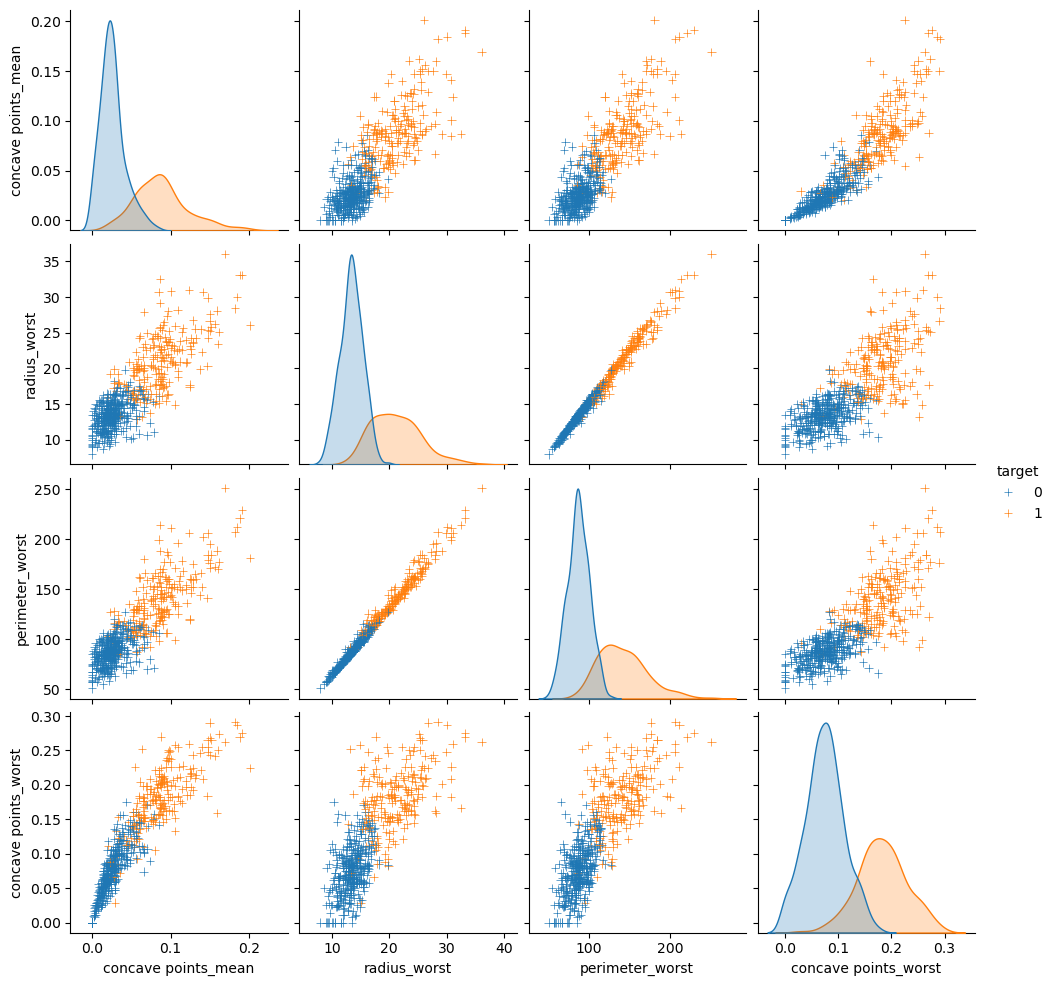

In [19]:
#pair plot
sns.pairplot(cancer_data[corr_features], diag_kind = "kde", markers = "+", hue = "target")
plt.show()

### Detection

In [20]:
y = cancer_data.target
x = cancer_data.drop(["target"], axis = 1)

columns = x.columns.tolist()
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [23]:
clf = LocalOutlierFactor()

# We see if it is outlier or not, -1 is outlier
y_pred = clf.fit_predict(x)

# we need outlier factor values 
X_score = clf.negative_outlier_factor_

In [24]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
outlier_score

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936
...,...
564,-1.330082
565,-0.997906
566,-0.997441
567,-0.993730


We make the data DataFrame to see the outliers better.


In [25]:
# threshold
# It will show us the ones with outlier value above 2.5
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
outlier_index

[461]

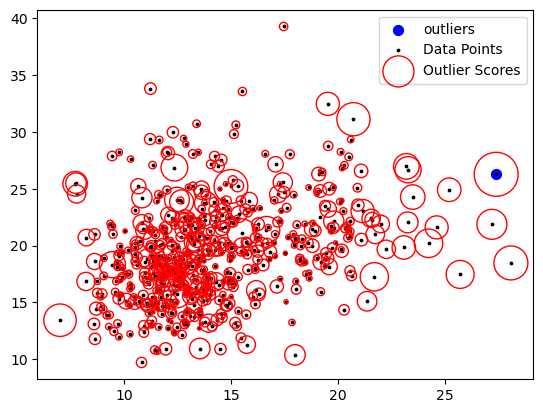

In [30]:
# Assume that `x` is a 2D numpy array containing the data points,
# `outlier_index` is a 1D numpy array containing the indices of the outliers,
# and `X_score` is a 1D numpy array containing the outlier scores.
plt.figure()

# Scatter plot the outliers in blue
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color = "blue", s = 50, label = "outliers")

# Scatter plot the data points in black
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = "k", s = 3, label = "Data Points")

# We do normalization for the plotting process
radius = (X_score.max()- X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s = 1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

We detected outliers above 2.5



In [31]:
# Subtract the value we determined above from the data
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

##### Train - Test Split

In [32]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

#####  Standrization

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["target"] = Y_train

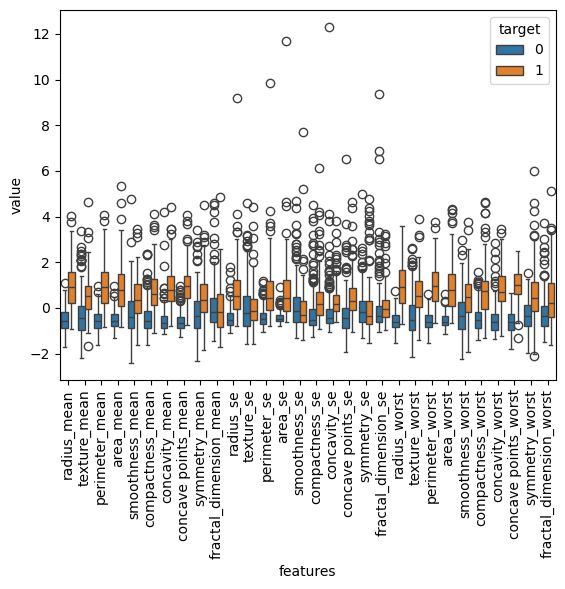

In [34]:
# box plotting
data_melted = pd.melt(X_train_df, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

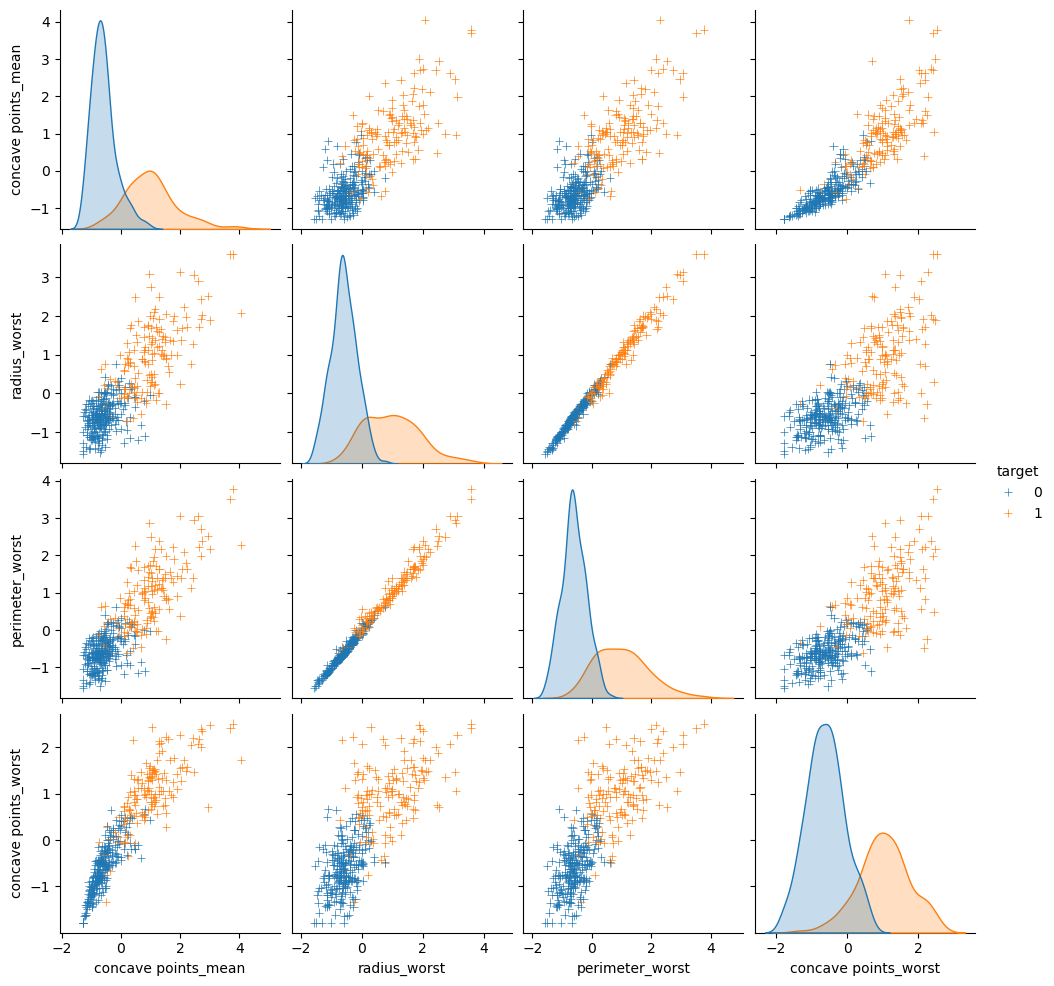

In [35]:
# pair plot 
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()


We aim to standardize our data to minimize significant variations among features. Large differences between features can adversely impact the performance of the model.

## KNN Methods

Basic KNN Accuracy: 0.9532163742690059


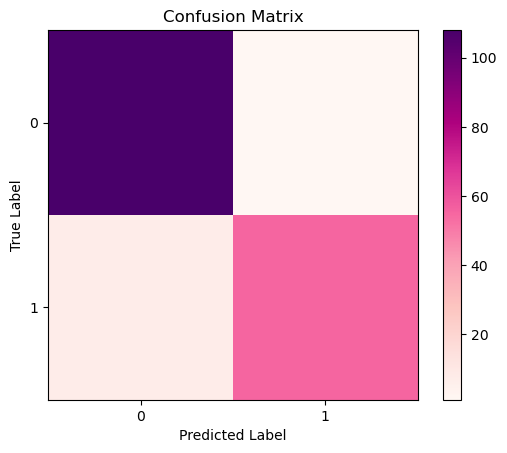

In [49]:


# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)

# Predictions
y_pred = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Calculate accuracy
acc = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Basic KNN Accuracy:", acc)

# Visualize confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Confusion Matrix')
plt.colorbar()

classes = set(Y_test)  # Assuming Y_test contains all unique classes
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


We formulated the KNN model to generate predictions. Following that, we conducted an assessment and examined our success outcomes. Ultimately, we scrutinized the count of inaccuracies by utilizing a confusion matrix.







### KNN Best Params

In [57]:

def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1, 31))
    weight_options = ["uniform", "distance"]
    print()
    
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score : {} with parameters : {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    
    # Visualize confusion matrix for test set
    plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.RdPu)
    plt.title("Test Confusion Matrix", color="Darkred")
    plt.colorbar()
    classes = set(y_test)
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Visualize confusion matrix for train set
    plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.RdPu)
    plt.title("Train Confusion Matrix", color="Darkred")
    plt.colorbar()
    classes = set(y_train)
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    return grid



Best training score : 0.9670512820512821 with parameters : {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831


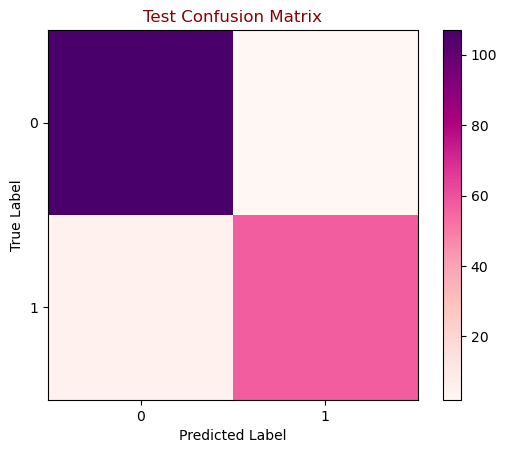

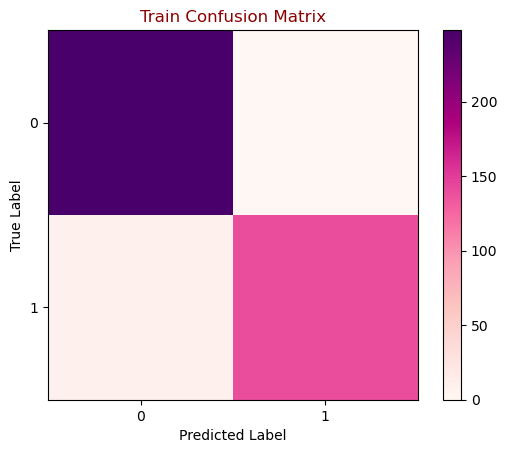

In [56]:
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)
